<a href="https://colab.research.google.com/github/dbtronics/Family-Housing-Predictor/blob/main/Housing_and_Loan_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from array import array
import math
# import sklearn.neural_network.MLPClassifier as mlp
# from sklearn import neural_network.MLPClassifier as mlp
import sklearn.neural_network as mlp

# Data Collection

## Loan Prediction

Train Data for Loan Amount:
Frequency: 614
Max: 700.0
Min: 9.0
Mean: 146.41216216216216
Std: 85.51500809120331

23 data are <= $50k
154 data are <= $100k
392 data are <= $150k
512 data are <= $200k
540 data are <= $250k
563 data are <= $300k
573 data are <= $350k
578 data are <= $400k
580 data are <= $450k
587 data are <= $500k
587 data are <= $550k
590 data are <= $600k
591 data are <= $650k
592 data are <= $700k


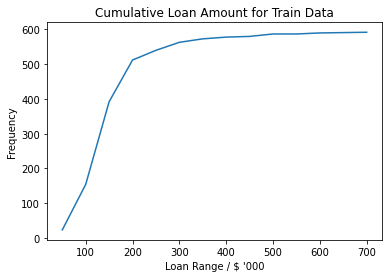


Test Data for Loan Amount:
Frequency: 367
Max: 550.0
Min: 28.0
Mean: 136.13259668508286
Std: 61.28183320611851

12 data are <= $50k
91 data are <= $100k
262 data are <= $150k
332 data are <= $200k
344 data are <= $250k
356 data are <= $300k
357 data are <= $350k
359 data are <= $400k
360 data are <= $450k
361 data are <= $500k
362 data are <= $550k
362 data are <= $600k
362 data are <= $650k
362 data are <= $700k


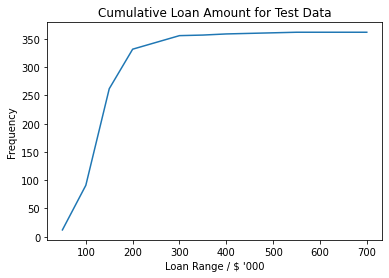

In [2]:
test_loan_path = "/content/test_loan_predictor.csv"
train_loan_path = "/content/train_loan_predictor.csv"
pd_raw_test_loan_prediction = pd.read_csv(test_loan_path)
pd_raw_train_loan_prediction = pd.read_csv(train_loan_path)
pd_raw_loan_prediction = {
    "test": pd_raw_test_loan_prediction,
    "train": pd_raw_train_loan_prediction
}
# # print("Test Data:")
# # pd_house_price["test"].head(5)
# print("\nTrain Data:")
# pd_raw_loan_prediction["train"].head(5)
# print(np.sum(pd_raw_loan_prediction["train"].loc[:, "Loan_Status"]=="Y"))
# print(np.sum(pd_raw_loan_prediction["train"].loc[:, "Loan_Status"]=="N"))

train_loan = pd_raw_loan_prediction["train"].loc[:, "LoanAmount"]
print("Train Data for Loan Amount:")
print("Frequency: " + str(len(train_loan)))
print("Max: " + str(np.max(train_loan)))
print("Min: " + str(np.min(train_loan)))
print("Mean: " + str(np.mean(train_loan)))
print("Std: " + str(np.std(train_loan)))

print("")
loan_range_list = np.array(range(50, 701, 50))

loan_range_freq = []
for i in range(loan_range_list.shape[0]):
  loan_range_freq.append(np.sum(train_loan<=loan_range_list[i]))
  print("%d data are <= $%dk"%(loan_range_freq[i], loan_range_list[i]))

plt.plot(loan_range_list, loan_range_freq)
plt.title("Cumulative Loan Amount for Train Data")
plt.xlabel("Loan Range / $ '000")
plt.ylabel("Frequency")
plt.show()

test_loan = pd_raw_loan_prediction["test"].loc[:, "LoanAmount"]
print("\nTest Data for Loan Amount:")
print("Frequency: " + str(len(test_loan)))
print("Max: " + str(np.max(test_loan)))
print("Min: " + str(np.min(test_loan)))
print("Mean: " + str(np.mean(test_loan)))
print("Std: " + str(np.std(test_loan)))

print("")
loan_range_freq = []
for i in range(loan_range_list.shape[0]):
  loan_range_freq.append(np.sum(test_loan<=loan_range_list[i]))
  print("%d data are <= $%dk"%(loan_range_freq[i], loan_range_list[i]))

plt.plot(loan_range_list, loan_range_freq)
plt.title("Cumulative Loan Amount for Test Data")
plt.xlabel("Loan Range / $ '000")
plt.ylabel("Frequency")
plt.show()

## House Price Prediction

Information on Price Label
Frequency: 25351
Max: 32500000
Min: 0
Mean: 564543.76513747
Std: 847579.4499583126
Unique values: 3792


Range of values
156 data are <= $0
925 data are <= $10,000
1,544 data are <= $50,000
2,678 data are <= $100,000
5,794 data are <= $200,000
9,879 data are <= $300,000
13,975 data are <= $400,000
16,882 data are <= $500,000
18,908 data are <= $600,000
20,398 data are <= $700,000
21,473 data are <= $800,000
22,201 data are <= $900,000
22,736 data are <= $1,000,000
24,493 data are <= $2,000,000
24,965 data are <= $3,000,000
25,147 data are <= $4,000,000
25,227 data are <= $5,000,000
25,330 data are <= $10,000,000
25,348 data are <= $20,000,000
25,350 data are <= $30,000,000
25,351 data are <= $40,000,000


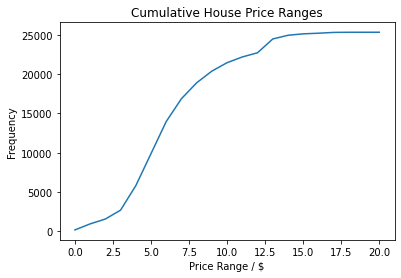

['Richview', 'Chedoke Park B', 'Ainslie Wood East', 'Greenford', 'Downtown', 'Old East York', 'Fairbank', 'Central Hamilton', 'Gourley', 'Red Hill', 'Clearview', 'Wallace Emerson', 'Parkdale', 'Midtown Toronto', 'Dorset Park', 'Hillcrest Village', 'Morningside', 'St. Andrew - Windfields', 'Bayview Woods - Steeles', 'Agincourt', 'St. Clair West Village', 'Ionview', 'Kennedy Park', 'Rexdale', "Tam O'Shanter", 'Woburn', 'Humber Heights - Westmount', "Tam O'Shanter - Sullivan", 'Malvern', 'Don Valley Village', 'Milliken', 'Wilson Heights', 'Willowdale', 'Wexford - Maryvale', 'Hamilton', 'Burkholme', 'Delta East', 'North End East', 'Landsdale', 'East Hamilton', 'Riverdale East', 'McQuesten West', 'Homeside', 'Glen Abbey', 'Oakville', 'Kerr Village', 'West Oak Trails', 'Uptown Core', 'Mimico', 'Newtonbrook', 'Princess Margaret', 'Nortown', 'Flemingdon Park', 'The Beach', 'Niagara', 'Bridlewood', 'Liberty Village', 'Bayview Village', 'Bendale', 'Birch Cliff', 'Swansea', 'Henry Farm', 'Humberl

In [3]:
house_path = "/content/ontario_data.csv"
pd_raw_house_price = pd.read_csv(house_path)
# print("Data")
pd_raw_house_price

# Analyzing our price labels
price = pd_raw_house_price.loc[:,"Price ($)"]
print("Information on Price Label")
print("Frequency: " + str(len(price)))
print("Max: " + str(np.max(price)))
print("Min: " + str(np.min(price)))
print("Mean: " + str(np.mean(price)))
print("Std: " + str(np.std(price)))
print("Unique values: " + str(len(np.unique(price))))

print("\n")
print("Range of values")
price_range_list = [0, 10e3, 50e3, 100e3, 200e3, 
                    300e3, 400e3, 500e3, 600e3, 
                    700e3, 800e3, 900e3, 1e6, 
                    2e6, 3e6, 4e6, 5e6, 10e6, 
                    20e6, 30e6, 40e6]
price_range_freq = []
for value in price_range_list:
  freq = np.sum(price<=value)
  price_range_freq.append(freq)
  # print("%d data are <= %d "%(freq, value))
  print("{:0,d} data are <= ${:0,.0f}".format(freq, value))

plt.plot(range(len(price_range_list)), price_range_freq)
plt.title("Cumulative House Price Ranges")
plt.xlabel("Price Range / $")
plt.ylabel("Frequency")
plt.show()

AreaNameList = []
for area in pd_raw_house_price.loc[:, 'AreaName']:
  # print(area)
  if area not in AreaNameList:
    AreaNameList.append(area)
print(AreaNameList)
print(len(AreaNameList))

# Normalization

## Loan Prediction

In [4]:
"""
Gender: ['Female' 'Male']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
ApplicantIncome: Continuous
CoapplicantIncome: Continuous
LoanAmount: Continuous (MULTIPLY THIS DATA BY 3 SO IT CAN BE TREATED AS MORTGAGE)
Loan_Amount_Term: [ 36.  60.  84. 120. 180. 240. 300. 360. 480.]
Credit_History: [0. 1.]
Property_Area: ['Rural' 'Semiurban' 'Urban']
Loan_Status: ['N' 'Y']
"""
pd_test_loan_prediction = pd_raw_loan_prediction["test"].copy()
pd_train_loan_prediction = pd_raw_loan_prediction["train"].copy()

pd_loan_prediction = {
    "test": pd_test_loan_prediction,
    "train": pd_train_loan_prediction
}

for key, df in pd_loan_prediction.items():
  isLabel = True if key=="train" else False
  # Remove all blank entries
  print("_____________________________________________________________________________________________")
  print("\nInitial %s Total: %d"%(key.title(), df.shape[0]))

  pd_loan_prediction[key] = (
      df.assign(
        gender_isNull = df["Gender"].isnull(),
        married_isNull = df["Married"].isnull(),
        dependent_isNull = df["Dependents"].isnull(),
        education_isNull = df["Education"].isnull(),
        self_employed_isNull = df["Self_Employed"].isnull(),
        ApplicantIncome_isNull = df["ApplicantIncome"].isnull(),
        CoapplicantIncome_isNull = df["CoapplicantIncome"].isnull(),
        LoanAmount_isNull = df["LoanAmount"].isnull(),
        Loan_Amount_Term_isNull = df["Loan_Amount_Term"].isnull(),
        Credit_History_isNull = df["Credit_History"].isnull(),
        Property_Area_isNull = df["Property_Area"].isnull()
      )
  
      .query("gender_isNull == False")
      .query("married_isNull == False")
      .query("dependent_isNull == False")
      .query("education_isNull == False")
      .query("self_employed_isNull == False")
      .query("ApplicantIncome_isNull == False")
      .query("CoapplicantIncome_isNull == False")
      .query("LoanAmount_isNull == False")
      .query("Loan_Amount_Term_isNull == False")
      .query("Credit_History_isNull == False")
      .query("Property_Area_isNull == False")

      .drop(["Loan_ID", "gender_isNull", "married_isNull", "dependent_isNull", "education_isNull", 
            "self_employed_isNull", "ApplicantIncome_isNull", "CoapplicantIncome_isNull", 
            "LoanAmount_isNull", "Loan_Amount_Term_isNull", "Credit_History_isNull", 
            "Property_Area_isNull"], axis = "columns")
  )
  pd_loan_prediction[key].reset_index(inplace=True, drop=True)

  print("Final %s Total: %d"%(key.title(), pd_loan_prediction[key].shape[0]))
  # print(df.shape[0])

  print("\n\nIndexing the Features")
  gender_value = np.unique(pd_loan_prediction[key].loc[:, "Gender"]).tolist()
  married_value = np.unique(pd_loan_prediction[key].loc[:, "Married"]).tolist()
  dependents_value = np.unique(pd_loan_prediction[key].loc[:, "Dependents"]).tolist()
  education_value = np.unique(pd_loan_prediction[key].loc[:, "Education"]).tolist()
  self_employed_value = np.unique(pd_loan_prediction[key].loc[:, "Self_Employed"]).tolist()
  loanAmountTerm_value = np.unique(pd_loan_prediction[key].loc[:, "Loan_Amount_Term"]).tolist()
  creditHistory_value = np.unique(pd_loan_prediction[key].loc[:, "Credit_History"]).tolist()
  propertyArea_value = np.unique(pd_loan_prediction[key].loc[:, "Property_Area"]).tolist()
  if (isLabel): loanStatus_value = np.unique(pd_loan_prediction[key].loc[:, "Loan_Status"]).tolist()

  N = pd_loan_prediction[key].shape[0]
  gender_index = [None]*N
  married_index = [None]*N
  dependents_index = [None]*N
  education_index = [None]*N
  self_employed_index = [None]*N
  loanAmountTerm_index = [None]*N
  creditHistory_index = [None]*N
  propertyArea_index = [None]*N
  if (isLabel): loanStatus_index = [None]*N

  for i in range(N):
    gender_index[i] = gender_value.index(pd_loan_prediction[key].loc[i, "Gender"])
    married_index[i] = married_value.index(pd_loan_prediction[key].loc[i, "Married"])
    dependents_index[i] = dependents_value.index(pd_loan_prediction[key].loc[i, "Dependents"])
    education_index[i] = education_value.index(pd_loan_prediction[key].loc[i, "Education"])
    self_employed_index[i] = self_employed_value.index(pd_loan_prediction[key].loc[i, "Self_Employed"])
    loanAmountTerm_index[i] = loanAmountTerm_value.index(pd_loan_prediction[key].loc[i, "Loan_Amount_Term"])
    creditHistory_index[i] = creditHistory_value.index(pd_loan_prediction[key].loc[i, "Credit_History"])
    propertyArea_index[i] = propertyArea_value.index(pd_loan_prediction[key].loc[i, "Property_Area"])
    if (isLabel): loanStatus_index[i] = loanStatus_value.index(pd_loan_prediction[key].loc[i, "Loan_Status"])

  pd_loan_prediction[key] = (
      pd_loan_prediction[key]
      .assign(
          Gender = gender_index,
          Married = married_index,
          Dependents = dependents_index,
          Education = education_index,
          Self_Employed = self_employed_index,
          LoanAmount = pd_loan_prediction[key].loc[:, "LoanAmount"]*3e3,
          Loan_Amount_Term = loanAmountTerm_index,
          Credit_History = creditHistory_index,
          Property_Area = propertyArea_index
      )
  )
  if isLabel:
        pd_loan_prediction[key] = pd_loan_prediction[key].assign(Loan_Status = loanStatus_index)
  print("Final Data for %s"%key.title())
  print(pd_loan_prediction[key].head(10))
  print("\n")
  print("_____________________________________________________________________________________________")



_____________________________________________________________________________________________

Initial Test Total: 367
Final Test Total: 289


Indexing the Features
Final Data for Test
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           0          0              0             5720   
1       1        1           1          0              0             3076   
2       1        1           2          0              0             5000   
3       1        0           0          1              0             3276   
4       1        1           0          1              1             2165   
5       0        0           1          1              0             2226   
6       1        1           2          1              0             3881   
7       1        0           0          1              0             2400   
8       1        0           0          1              0             3091   
9       0        0           0          0    

## House Price Prediction

In [6]:
"""
S.No: Unnecessary
Address: Unnecessary
Area Name: 0, 1, 2, ... , 1120
Price: continuous LABEL
Lat: continuous
Long: continuous
"""
# Based on data above, we're only including house prices with prices more than $100k
print("Initial Total Data: %d"%pd_raw_house_price.shape[0])
# pd_house_price = pd_raw_house_price.assign(
#     inPriceRange = lambda x: x['Price ($)']>=1e5,
#     Latitude = lambda x: x['lat'],
#     Longitude = lambda x: x['lng']
# )

pd_house_price = (
    pd_raw_house_price
    .assign(
      inPriceRange = lambda x: x['Price ($)']>=1e5,
      Latitude = lambda x: x['lat'],
      Longitude = lambda x: x['lng']
    )

    .query("inPriceRange == True")
    # .query("[Price ($)] >=100000")
    .drop(["Address", "lat", "lng", "inPriceRange", "Unnamed: 0"], axis="columns")
)
pd_house_price.reset_index(inplace=True, drop=True)
print("Final Total Data: %d"%pd_house_price.shape[0])

AreaNameIndex = [None]*pd_house_price.shape[0]
for i in range(pd_house_price.shape[0]):
  AreaNameIndex[i] = AreaNameList.index(pd_house_price.loc[i, "AreaName"])
pd_house_price = pd_house_price.assign(AreaName = AreaNameIndex)

"""
2,678 data are <= $100,000
5,794 data are <= $200,000 (100k - 200k) --> 0
9,879 data are <= $300,000 (200k - 300k) --> 1
13,975 data are <= $400,000 (300k - 400k) --> 2
16,882 data are <= $500,000 (400k - 500k) --> 3
18,908 data are <= $600,000 (500k - 600k) --> 4
20,398 data are <= $700,000 (600k - 700k) --> 5
21,473 data are <= $800,000 (700k - 800k) --> 6
22,201 data are <= $900,000 (800k - 900k) --> 7
22,736 data are <= $1,000,000 (900k - 1m) --> 8
24,493 data are <= $2,000,000 (1m - 2m) --> 9
24,965 data are <= $3,000,000 (2m - 3m) --> 10
25,147 data are <= $4,000,000 (3m - 4m) --> 11
25,227 data are <= $5,000,000 (4m - 5m) --> 12
25,330 data are <= $10,000,000 (5m - 10m) --> 13
25,348 data are <= $20,000,000 (10m - 20m) --> 14
25,350 data are <= $30,000,000 (20m - 30m) --> 15
25,351 data are <= $40,000,000 (30m - 40m) --> 16
"""

# Arranging price into brackets to help in discrete classification
price_range_list = [2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5, 1e6, 2e6, 3e6, 4e6, 5e6, 1e7, 2e7, 3e7, 4e7]
# print(price_range_list)

N = pd_house_price.shape[0]
price_range_bracket = [None]*N

for i in range(N):
  temp_price = pd_house_price.loc[i, "Price ($)"]
  for j in range(len(price_range_list)):
    if not(temp_price>price_range_list[j]):
      price_range_bracket[i] = j
      break;

pd_house_price = (
    pd_house_price
    .assign(Price_Range = price_range_bracket)
    .drop("Price ($)", axis=1)
)
pd_house_price

Initial Total Data: 25351
Final Total Data: 22686


,AreaName,Latitude,Longitude,Price_Range
0,0,43.679882,-79.544266,8
1,1,43.250000,-79.904396,2
2,2,43.251690,-79.919357,3
3,3,43.227161,-79.767403,1
4,4,43.651478,-79.368118,2
...,...,...,...,...
22681,719,45.353519,-75.807793,0
22682,138,45.441273,-75.532745,5
22683,326,45.238155,-75.602249,7
22684,245,45.453838,-75.650040,1


# Prediction

## Parameter Settings

In [7]:
print("Vary these perimenters to test the model")
Gender = 'Male'
Married = 'Yes'
Dependents = '2'
Education = 'Graduate'
Self_Employed = 'Yes'
ApplicantIncome = 200
CoapplicantIncome = 100
downPayment = 0.2 # 20% down payment
Loan_Amount_Term = 360
Credit_History = 1
Property_Area = 'Urban'
AreaName = 4 #(chose between 0 - 1120)
Lat = 45.589
Long = 79.4325

print("\nFinancial Background:")
print("Gender: %s \tMarried: %s \tDependents: %s \tEducation: %s \tSelf Employed: %s \nApplicant Income: %d \tCo-Applicant Income: %d \nDown Payment: %.2f \tLoan Amount Term: %d \tCredit History: %d"%(
    Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, downPayment, Loan_Amount_Term, Credit_History))
print("\nProperty Background:")
print("Property Area: %s \t Area Name: %s \tLatitude: %.3f \tLongitude: %.3f"%(Property_Area, AreaNameList[AreaName], Lat, Long))

Vary these perimenters to test the model

Financial Background:
Gender: Male 	Married: Yes 	Dependents: 2 	Education: Graduate 	Self Employed: Yes 
Applicant Income: 200 	Co-Applicant Income: 100 
Down Payment: 0.20 	Loan Amount Term: 360 	Credit History: 1

Property Background:
Property Area: Urban 	 Area Name: Downtown 	Latitude: 45.589 	Longitude: 79.433


## Housing Prediction

In [8]:
# house_price_model = MLP(3, 17, bias=True)
x = pd_house_price.loc[:, ['AreaName', 'Latitude', 'Longitude']]
y = pd_house_price.loc[:, "Price_Range"]

# pass it through the model
house_price_model = mlp.MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000).fit(x,y)

xtest = {
    "AreaName": [AreaName],
    "Latitude": [Lat],
    "Longitude": [Long]
}
xtest = pd.DataFrame(xtest)

yh = house_price_model.predict(xtest)
yh_prob = house_price_model.predict_proba(xtest)

# convert discrete label into a continuous data
for i in range(yh.shape[0]):
  index = yh[i]
  if (index==0): 
    house_price = 1e5+(-1e5+price_range_list[index])*(yh_prob[i, index]/np.sum((yh_prob[i, :index+2])))
    print("Price Range: ${:0,.0f} – ${:0,.0f} --> ${:0,.2f}".format(1e5, price_range_list[index], house_price))
  else: 
    house_price = price_range_list[index-1]+(-price_range_list[index-1]+price_range_list[index])*(yh_prob[i, index]/np.sum((yh_prob[i, index-1:index+1])))
    print("Price Range: {:0,.0f} – {:0,.0f} --> ${:0,.2f}".format(price_range_list[index-1], price_range_list[index], house_price))
# print(yh)

Price Range: 400,000 – 500,000 --> $487,363.11


## Loan Prediction

In [9]:
print("House Price: ${:0,.2f}".format(house_price))
print("Down Payment: ${:0,.2f}".format(house_price*downPayment))
print("Mortgage Needed: ${:0,.2f}".format(house_price*(1-downPayment)))

mortgage = house_price*(1-downPayment)

x = pd_loan_prediction["train"].iloc[:, :-1]
y = pd_loan_prediction["train"].iloc[:, -1]
# print(pd_loan_prediction["train"].iloc[:, :-1])
loan_prediction_model = mlp.MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000).fit(x,y)
xtest = {
    "Gender": [gender_value.index(Gender)],
    "Married": [married_value.index(Married)],
    "Dependents": [dependents_value.index(Dependents)],
    "Education": [education_value.index(Education)],
    "Self_Employed": [self_employed_value.index(Self_Employed)],
    "ApplicantIncome": [ApplicantIncome],
    "CoapplicantIncome": [CoapplicantIncome],
    "LoanAmount": [mortgage],
    "Loan_Amount_Term": [loanAmountTerm_value.index(Loan_Amount_Term)],
    "Credit_History": [creditHistory_value.index(Credit_History)],
    "Property_Area": [propertyArea_value.index(Property_Area)]
}
xtest = pd.DataFrame(xtest)

yh = loan_prediction_model.predict(xtest)

print("\nLoan Approval: %s"%loanStatus_value[yh[0]])

House Price: $487,363.11
Down Payment: $97,472.62
Mortgage Needed: $389,890.49

Loan Approval: Y
